# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1) Is the distribution of body temperatures normal? 2) Is the sample large?

In [3]:
# Desriptive statistics (sample size, sample mean, sample standard deviation, standard error, skewness)
n = len(df)
mean = df.temperature.mean()
std = df.temperature.std()
sem = df.temperature.sem()
skewness = df.temperature.skew()
print('n: ', n)
print('Mean: ', mean)
print('SD: ', std)
print('SE: ', sem)
print('Skewness: ', skewness)

n:  130
Mean:  98.24923076923078
SD:  0.7331831580389454
SE:  0.0643044168379
Skewness:  -0.004419131169


In [4]:
# number of point with 0.1 F interval
num = int((df.temperature.max()-df.temperature.min())*10)
num

45

In [5]:
# number of distinct temperature point
len(df.groupby('temperature').size())

34

In [6]:
# creating a list
T = sorted(df.temperature)

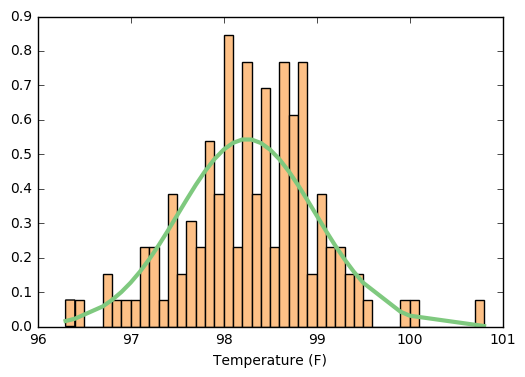

In [7]:
# plotting the sample distribution as a histogram
# fitting the distribution with a probaility density function (PDF)
pdf = stats.norm.pdf(T, mean, std)
plt_fit = plt.plot(T, pdf, linewidth=3, color=COLOR1)
plt_hist = plt.hist(T, num, normed=True, color=COLOR3)
plt_label = plt.xlabel('Temperature (F)')

## Answers:
Sample statistic shows that the sample size is high, and based on skewness, which is close to zero, we can conclude that the sample distribution is normal and very close to population distribution.

It seems that the observation is independent (random type indicated in the data description), though possibility of a bias cannot be excluded completely.

Visualization of the sample distribution by plotting it as a normalized histogram and fitting it with a probability density function supports the above conclusions.

## 3) Is the true population mean really 98.6 degrees F?
The sample mean is 98.25 degrees F, which is different from the population mean. So, the null hypothesis proposes that the true population mean is 98.6 and the sample distribution is not true representation of the population distribution.

One-sample test will be used in this case, since we need to determine whether the sample mean differs from a specified value, and the standard deviation of the population is not known.

It is appropriate to use z statistic in this case, since the sample size (130) is relatively high (samples of size 30 or higher are considered to be large samples). 

In [8]:
# Null Hypothesis Test - Z-test
# Calculating z-score and p-value
z, p = stats.ttest_1samp(T, 98.6)
print('z-score: ', z)
print('p-value: ', p)

z-score:  -5.45482329236
p-value:  2.41063204156e-07


In [9]:
# Null Hypothesis Test - t-test
# Calculating p-value
z = (mean - 98.6)/sem
p = 2*stats.norm.cdf(-np.abs(z))
print('p-value: ', p)

p-value:  4.90215701411e-08


The Z-test p-value differs (5 times higher) from the t-test p-value. If the sample size were higher, the two approaches would give closer values. However, the both values are smaller than the 0.05 value corresponding to the significance level of 5%. Therefore, the null hypothesis is rejected, which means that true population mean is not 98.6.

## 4) At what temperature should we consider someone's temperature to be "abnormal"? 

In [10]:
# Calculing confidence intervals with a confidence level of 95%
low, high = stats.norm.interval(0.95, loc=mean, scale=sem)
low, high

(98.123196428181657, 98.375265110279898)

In [11]:
# Margin of error
high - mean

0.12603434104912026

Based on the above calculated confidence intervals with a confidence level of 95%, we can propose that "abnormal" temperature is lower than 98.12 and higher than 98.38 degrees F.

## 5) Is there a significant difference between males and females in normal temperature?

In [12]:
# Desriptive statistic for male and female groups
male = df[df.gender == 'M']
female = df[df.gender == 'F']

n_m = len(male)
mean_m = male.temperature.mean()
std_m = male.temperature.std()
sem_m = male.temperature.sem()
skewness_m = male.temperature.skew()
print('Male group')
print('n: ', n_m)
print('Mean: ', mean_m)
print('SD: ', std_m)
print('SE: ', sem_m)
print('Skewness: ', skewness_m)
print('--------------------------')

n_f = len(female)
mean_f = female.temperature.mean()
std_f = female.temperature.std()
sem_f = female.temperature.sem()
skewness_f = female.temperature.skew()
print('Female group')
print('n: ', n_f)
print('Mean: ', mean_f)
print('SD: ', std_f)
print('SE: ', sem_f)
print('Skewness: ', skewness_f)

Male group
n:  65
Mean:  98.1046153846154
SD:  0.6987557623265908
SE:  0.0866699855229
Skewness:  -0.213373135445
--------------------------
Female group
n:  65
Mean:  98.39384615384613
SD:  0.7434877527313665
SE:  0.0922183060804
Skewness:  0.0981875292979


In [13]:
# number of points with 0.1 F interval for male and female groups
num_m = int((male.temperature.max() - male.temperature.min())*10)
num_f = int((female.temperature.max() - female.temperature.min())*10)
num_m, num_f

(32, 43)

In [14]:
# creating lists
T_m = sorted(male.temperature)
T_f = sorted(female.temperature)

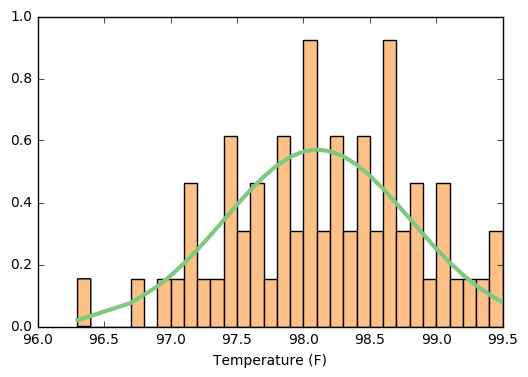

In [15]:
# plotting T distribution for the male group as a histogram
# fitting the distribution with a probaility density function (PDF)
pdf_m = stats.norm.pdf(T_m, mean_m, std_m)
plt_fit_m = plt.plot(T_m, pdf_m, linewidth=3, color=COLOR1)
plt_hist_m = plt.hist(T_m, num_m, normed=True, color=COLOR3)
plt_label_m = plt.xlabel('Temperature (F)')

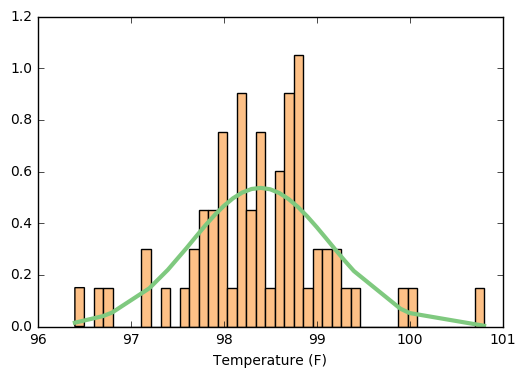

In [16]:
# plotting T distribution for the female group as a histogram
# fitting the distribution with a probaility density function (PDF)
pdf_f = stats.norm.pdf(T_f, mean_f, std_f)
plt_fit_f = plt.plot(T_f, pdf_f, linewidth=3, color=COLOR1)
plt_hist_f = plt.hist(T_f, num_f, normed=True, color=COLOR3)
plt_label_f = plt.xlabel('Temperature (F)')

In [17]:
# Calculing confidence intervals with a confidence level of 95% for the male group
stats.norm.interval(0.95, loc=mean_m, scale=sem_m)

(97.934745334449985, 98.274485434780814)

In [18]:
# Calculing confidence intervals with a confidence level of 95% for the female group
stats.norm.interval(0.95, loc=mean_f, scale=sem_f)

(98.213101595213331, 98.574590712478923)

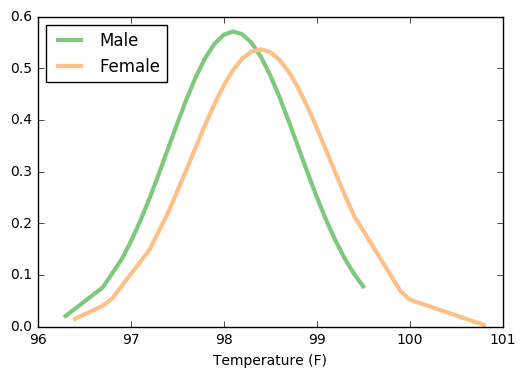

In [19]:
# Visualizing the overlap between the two distributions
plt_fit_m = plt.plot(T_m, pdf_m, linewidth=3, label='Male', color=COLOR1)
plt_fit_f = plt.plot(T_f, pdf_f, linewidth=3, label = 'Female', color=COLOR3)
plt_label_mf = plt.xlabel('Temperature (F)')
plt_legend = plt.legend(loc=2)

The null hypothesis proposes that there is no difference between the two group sample means. The alternative hypothesis proposes that there is a difference.

Two-sample t-test is used due to following considerations:
- the two group sample distributions are only slightly skewed and are normal
- the two groups are independent
- the sample groups represent the same population  

In [20]:
# Null Hypothesis t-test 
# Calculating z-score and p-value 
z, p = stats.ttest_ind(T_m, T_f, equal_var=False)
print('z-score: ', z)
print('p-value: ', p)

z-score:  -2.28543453817
p-value:  0.0239382641829


## Conclusion:

The null hypothesis is rejected, since p-value is less 0.05. This means that based on the two group samples we can conclude that there is a difference between male and female body temeperatures in a specific population. However, according to modern trends in statistics (Prof. Downey's talk at PyCon 2015), it is believed that p-value should be < 0.01 to reject the null hypothesis. Therefore, a study using higher sample size is proposed.